In [660]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as ptch

from datetime import datetime
import time
from os import listdir
from os.path import isfile, join
import re

plt.style.use('fivethirtyeight')
plt.style.use('bmh')

In [651]:
datetime(2020, 3, 15)

datetime.datetime(2020, 3, 15, 0, 0)

# Non-Pharmaceutical Interventions in Canada

Here we show comparisons of descriptive statistics for each regional and subregional-level dataset across Canada. Download individual region CSVs from the Google Sheet and place them in `./data/`. 

Stats Canada data on population size by province available from: 

Statistics Canada. Table 17-10-0009-01 Population estimates, quarterly"
https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1710000901
DOI: https://doi.org/10.25318/1710000901-eng


In [973]:
stats_columns=[
    'file',
    'region',
    'subregion', 
    'rows',
    'columns',
    'start_date.min', 
    'start_date.max', 
    'end_date.min', 
    'end_date.max', 
    'end_date.count / count', 
    'reviewer.unique', 
    'intervention_summary.unique', 
    'intervention_category.unique',
    'target_population_category.unique',
    'target_population_category (% not "General")',
    'enforcement_category.unique',
    'oxford_government_response_category.notna',
    'oxford_government_response_category.unique',
    'oxford_fiscal_measure_cad.sum',
    'source_url.unique'
]

columns=[
    'start_date',
    'end_date',
    'reviewer',
    'country',
    'region',
    'subregion',
    'intervention_summary',
    'intervention_category',
    'target_population_category',
    'enforcement_category',
    'oxford_government_response_category',
    'oxford_closure_code',
    'oxford_public_info_code',
    'oxford_travel_code',
    'oxford_geographic_target_code',
    'oxford_fiscal_measure_cad',
    'oxford_monetary_measure',
    'oxford_testing_code',
    'oxford_tracing_code',
    'source_url',
    'source_organization',
    'source_organization_2',
    'source_category',
    'source_title',
    'source_full_text',
    'note'
]

province_files = ['Prince Edward Island.csv', 'Newfoundland and Labrador.csv', 'Alberta.csv', 
             'British Columbia.csv', 'Yukon.csv', 'Saskatchewan.csv',
             'Ontario.csv', 'Nova Scotia.csv', 'New Brunswick.csv',
             'Nunavut.csv', 'Quebec.csv', 'Northwest Territories.csv', 'Manitoba.csv']

In [974]:
population_df = pd.read_csv('statscan-population-q.csv', thousands=',')
population_df[['Geography', 'Q1 2020']]
population_df['region'] = population_df['Geography']
population_df['population_q1_2020'] = pd.to_numeric(population_df['Q1 2020'])
population_df = population_df[['region', 'population_q1_2020']]
population_df

,region,population_q1_2020
0,Canada,37894799
1,Newfoundland and Labrador,521365
2,Prince Edward Island,158158
3,Nova Scotia,977457
4,New Brunswick,779993
5,Quebec,8537674
6,Ontario,14711827
7,Manitoba,1377517
8,Saskatchewan,1181666
9,Alberta,4413146


In [1002]:
full_df = pd.read_csv('Collecting NPIs Effects - FULL.csv')
full_df['start_date'] = pd.to_datetime(full_df['start_date'], format='%m/%d/%Y')
full_df['end_date'] = pd.to_datetime(full_df['end_date'], format='%m/%d/%Y')
full_df['oxford_fiscal_measure_cad'] = full_df['oxford_fiscal_measure_cad'].replace('[\$,]', '', regex=True).astype(float)

provinces_df = full_df[full_df['subregion'].isna() & full_df['subregion'].notna() & full_df['subregion'] != "All"]

federal_df = full_df[full_df['subregion'].isna() & (full_df['region'].isna() | (full_df['region'] == "All"))]

/usr/local/lib/python3.6/dist-packages/pandas/core/ops.py:816: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison

In [979]:
# TODO: No longer necessary, but would still like the stats.
"""
data_path = './data/'
csvs = [f for f in listdir(data_path) if isfile(join(data_path, f))]
stats_df = pd.DataFrame(columns=stats_columns)

full_df = pd.DataFrame(columns=columns)
provinces_df = pd.DataFrame(columns=columns)

#print(csvs)
for file in csvs:
    if file == ".DS_Store":
        continue
    print('Reading ', file)
    name = file.split("-", 1)[-1].strip(' ')
    df = pd.read_csv(data_path + file)
    df['start_date'] = pd.to_datetime(df['start_date'], format='%m/%d/%Y')
    df['end_date'] = pd.to_datetime(df['end_date'], format='%m/%d/%Y')
    df['oxford_fiscal_measure_cad'] = df['oxford_fiscal_measure_cad'].replace('[\$,]', '', regex=True).astype(float)
    
    full_df = full_df.append(df)
    if name in province_files:
        provinces_df = provinces_df.append(df)
    
    mode_sub = df['subregion'].mode()[0] if len(df['subregion'].mode()) > 0 else ''
    stats = [
        name,
        df['region'].mode()[0],
        mode_sub,
        df.shape[0],
        df.shape[1],
        df['start_date'].min(),
        df['start_date'].max(),
        df['end_date'].min(),
        df['end_date'].max(),
        len(df['end_date'].unique()) / df.shape[0],
        len(df['reviewer'].unique()),
        len(df['intervention_summary'].unique()),
        len(df['intervention_category'].unique()),
        len(df['target_population_category'].unique()),
        df[df['target_population_category'] != 'General'].shape[0] / df.shape[0],
        len(df['enforcement_category'].unique()),
        df[df['oxford_government_response_category'].notna() == True].count().max(),
        len(df['oxford_government_response_category'].unique()),
        df['oxford_fiscal_measure_cad'].sum(), 
        len(df['source_url'].unique()), 
    ]
    file_stats_df = pd.DataFrame([stats], columns=stats_columns)
    stats_df = pd.concat([stats_df, file_stats_df], ignore_index=True)

full_df = full_df.reindex(columns=columns)
provinces_df = provinces_df.reindex(columns=columns)
"""

'\ndata_path = \'./data/\'\ncsvs = [f for f in listdir(data_path) if isfile(join(data_path, f))]\nstats_df = pd.DataFrame(columns=stats_columns)\n\nfull_df = pd.DataFrame(columns=columns)\nprovinces_df = pd.DataFrame(columns=columns)\n\n#print(csvs)\nfor file in csvs:\n    if file == ".DS_Store":\n        continue\n    print(\'Reading \', file)\n    name = file.split("-", 1)[-1].strip(\' \')\n    df = pd.read_csv(data_path + file)\n    df[\'start_date\'] = pd.to_datetime(df[\'start_date\'], format=\'%m/%d/%Y\')\n    df[\'end_date\'] = pd.to_datetime(df[\'end_date\'], format=\'%m/%d/%Y\')\n    df[\'oxford_fiscal_measure_cad\'] = df[\'oxford_fiscal_measure_cad\'].replace(\'[\\$,]\', \'\', regex=True).astype(float)\n    \n    full_df = full_df.append(df)\n    if name in province_files:\n        provinces_df = provinces_df.append(df)\n    \n    mode_sub = df[\'subregion\'].mode()[0] if len(df[\'subregion\'].mode()) > 0 else \'\'\n    stats = [\n        name,\n        df[\'region\'].mode()[

In [980]:
full_df.shape

(1838, 26)

In [981]:
full_df.drop(columns=['reviewer']).to_csv('npi_full.csv')
provinces_df.drop(columns=['reviewer']).to_csv('npi_by_province.csv')

## NPI: Enforcement Categories


In [982]:
len(full_df['enforcement_category'].unique())

6

In [983]:
full_df.groupby(by='enforcement_category').count().max(axis=1).sort_values()

enforcement_category
Arrest                 6
Legal Action          30
Fines                 39
Refusal of Entry     144
Not Applicable      1445
dtype: int64

Text(0.5,0,'count')

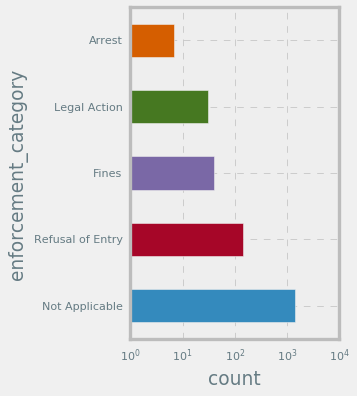

In [985]:
full_df.groupby(by="enforcement_category").count().max(axis=1).sort_values(ascending=False).plot.barh(log=True, figsize=(3,5))
plt.xlabel('count')

In [986]:
len(full_df['target_population_category'].unique())

17

In [987]:
full_df.groupby(by='target_population_category').count().max(axis=1).sort_values()

target_population_category
Essential service employees              3
All Students                             8
Incarcerated Adults                     13
Postsecondary Students                  20
Government Employees                    21
Adults in Longterm Care Facilities      24
COVID-19 Case Contacts                  24
Symptomatic Individuals                 24
Vulnerable Population - Homeless        30
Vulnerable Population - Elderly         31
School Students                         41
Businesses                              66
Vulnerable Populations - Low SES        66
Healthcare Workers                      73
Returning Travellers                    92
General                               1292
dtype: int64

Text(0.5,0,'count')

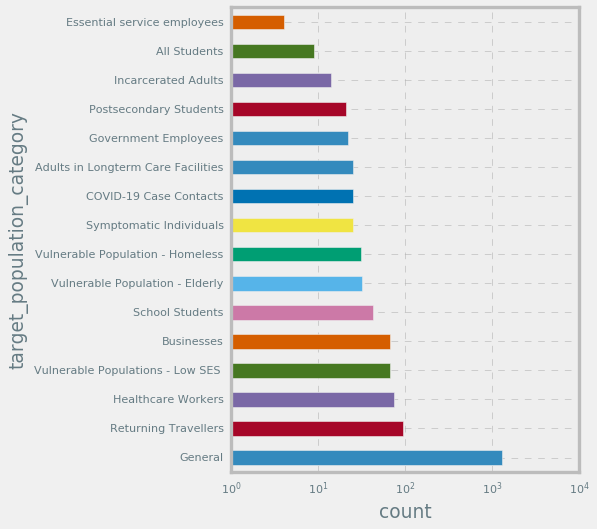

In [988]:
full_df.groupby(by="target_population_category").count().max(axis=1).sort_values(ascending=False).plot.barh(log=True, figsize=(5,7))
plt.xlabel('count')

## NPI: Intervention Categories

In [989]:
len(full_df['intervention_category'].unique())

60

In [990]:
pd.DataFrame(full_df.groupby(by='intervention_category').count().max(axis=1))

,0
intervention_category,
Administrative flexibility,31
Border closure,6
Case Definition Change,2
Correctional facility restrictions,13
Court closure,21
Creation of command center,20
Declaration of emergency (or similar),41
Education or Work from Home,22
Electoral poll cancelation,6


In [991]:
pd.DataFrame(full_df.groupby(by='intervention_category').apply(lambda x: x.sample(1)['intervention_summary'])[0:10])

,,intervention_summary
intervention_category,,
Administrative flexibility,1528,Provincial Guidance: daycare facilities are li...
Border closure,34,"Highway to border crossings closed, with excep..."
Case Definition Change,1576,Case definition expanded to include travel bey...
Correctional facility restrictions,1064,Increasing temporary absences maximum timefram...
Court closure,990,Suspension of in-person fine payment
Creation of command center,1738,Establishment of special cabinet committees
Declaration of emergency (or similar),285,Declaration of state of emergency for 48 hour ...
Education or Work from Home,1546,Plan for public service employees to work from...
Electoral poll cancelation,1715,Cancellation of electoral poll and any advanc...


Text(0.5,0,'count')

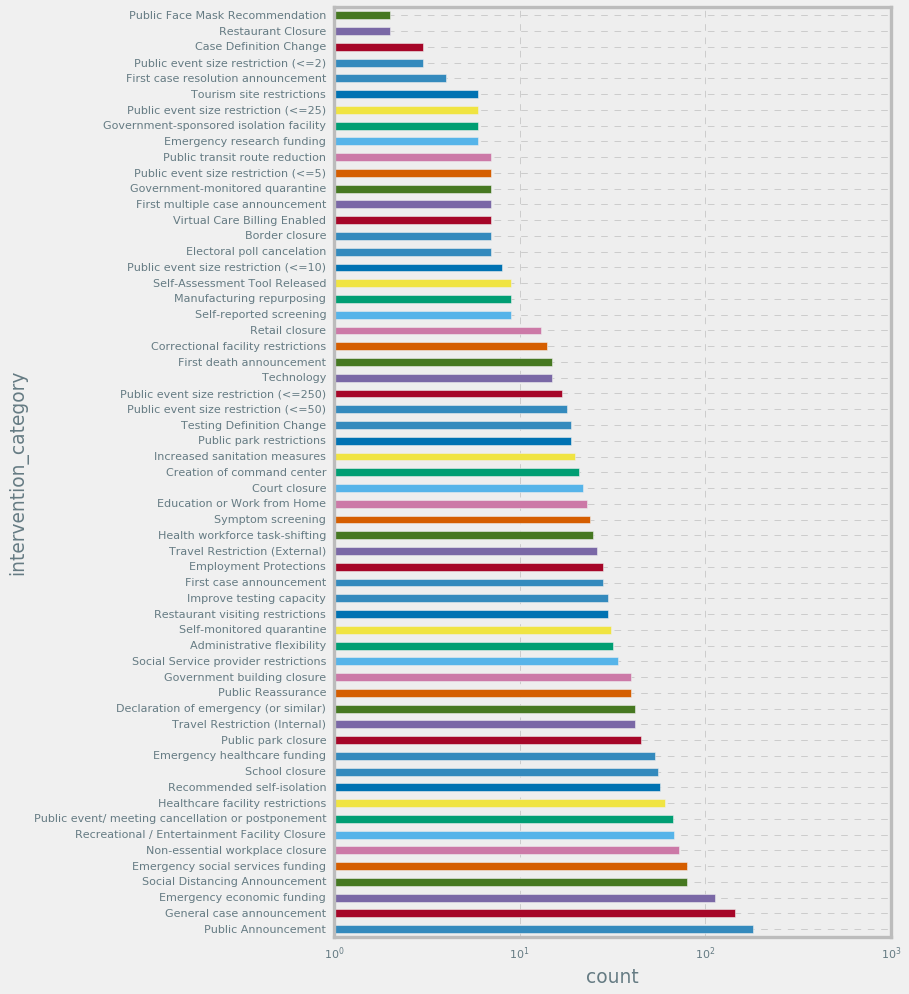

In [992]:

full_df.groupby(by="intervention_category").count().max(axis=1).sort_values(ascending=False).plot.barh(log=True, figsize=(8,14))
plt.xlabel('count')


## NPI: Fiscal Measures

Show investments by province or subregion

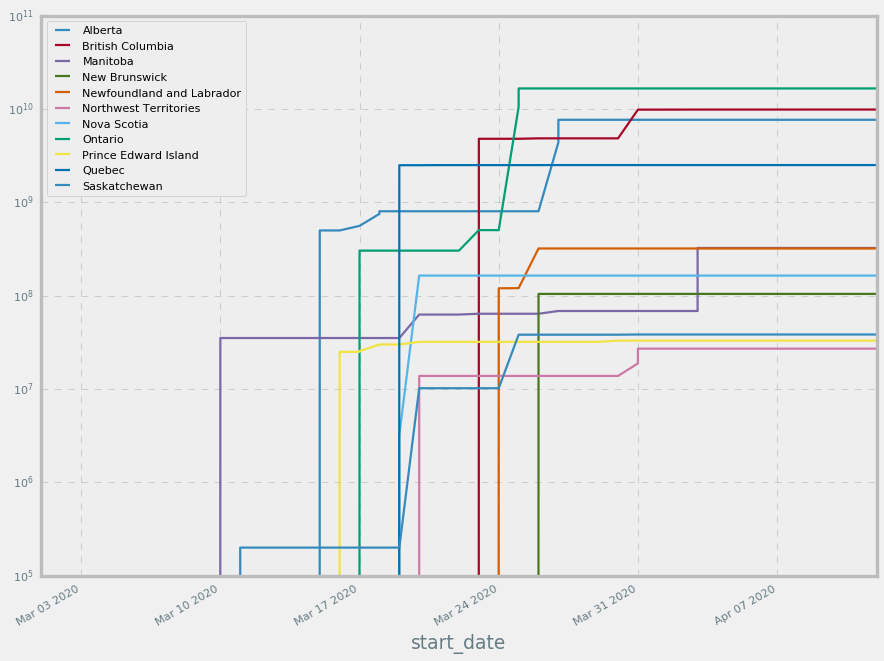

In [566]:
fig, ax = plt.subplots(figsize=(12,10))

dates = pd.date_range(start='03-01-2020', end='04-12-2020', name='dates').to_series() #mm-dd-yyyy
gb = provinces_df[provinces_df['oxford_fiscal_measure_cad'].notna()][['start_date', 'region', 'oxford_fiscal_measure_cad']].groupby(by='region')

for g_name, g_df in gb:
    all_dates_df = g_df.join(dates, on='start_date', how='right')
    all_dates_df['oxford_fiscal_measure_cad'] = all_dates_df['oxford_fiscal_measure_cad'].fillna(0)
    all_dates_df = all_dates_df.sort_values(by='start_date', ascending=True)
    all_dates_df['oxford_fiscal_measure_cad_cumsum'] = all_dates_df['oxford_fiscal_measure_cad'].cumsum(axis=0)
    #print(all_dates_df)
    all_dates_df.plot(x='start_date', y='oxford_fiscal_measure_cad_cumsum', label=g_name, ax=ax)

plt.yscale('log')

In [825]:
provinces_df[provinces_df['oxford_fiscal_measure_cad'].notna()]['oxford_fiscal_measure_cad']

(85,)

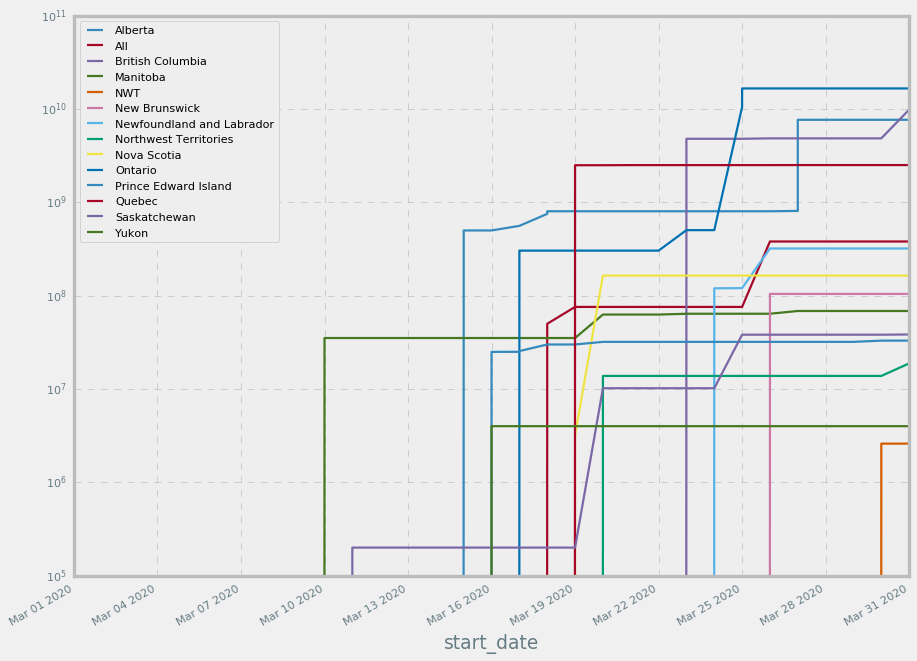

In [993]:
fig, ax = plt.subplots(figsize=(12,10))

dates = pd.date_range(start='03-01-2020', end='03-31-2020', name='dates').to_series() #mm-dd-yyyy
gb = provinces_df[provinces_df['oxford_fiscal_measure_cad'].notna()][['start_date', 'region', 'oxford_fiscal_measure_cad']].groupby(by='region')

for g_name, g_df in gb:
    all_dates_df = g_df.join(dates, on='start_date', how='right')
    all_dates_df['oxford_fiscal_measure_cad'] = all_dates_df['oxford_fiscal_measure_cad'].fillna(0)
    all_dates_df = all_dates_df.sort_values(by='start_date', ascending=True)
    all_dates_df['oxford_fiscal_measure_cad_cumsum'] = all_dates_df['oxford_fiscal_measure_cad'].cumsum(axis=0)
    #print(all_dates_df)
    all_dates_df.plot(x='start_date', y='oxford_fiscal_measure_cad_cumsum', label=g_name, ax=ax)

plt.yscale('log')

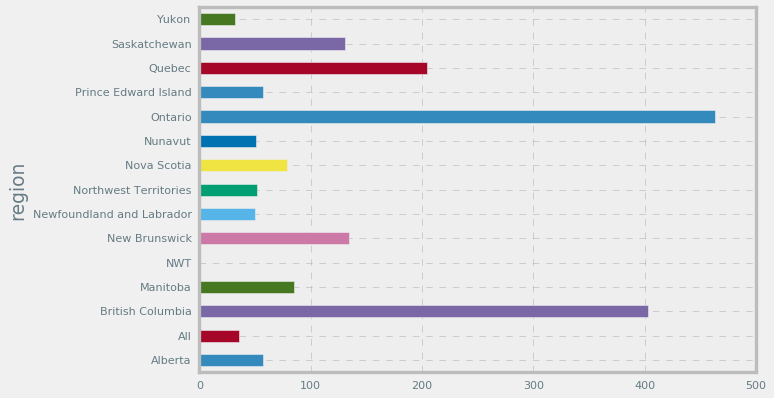

In [994]:
full_df.groupby(by=['region']).count().max(axis=1).plot.barh()

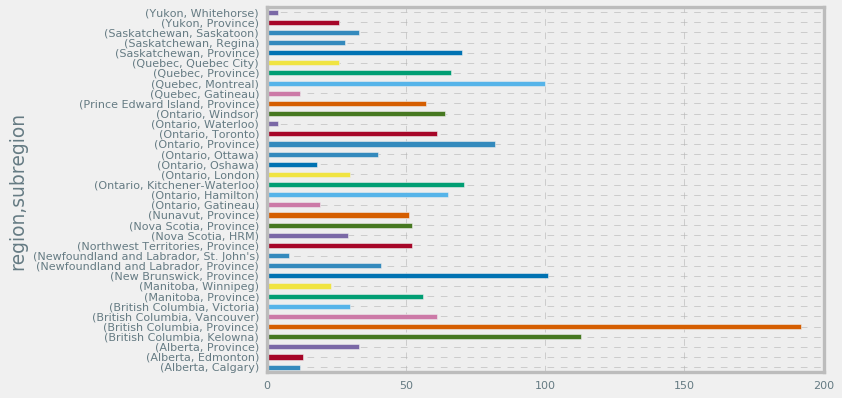

In [919]:
full_df.fillna('Province').groupby(by=['region', 'subregion']).count().max(axis=1).plot.barh()

Text(0.5,0,'Number of unique interventions')

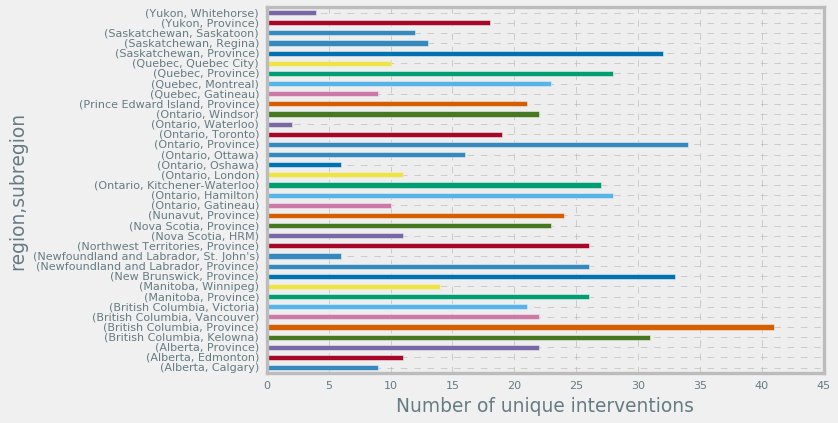

In [921]:
full_df.fillna('Province').groupby(by=['region', 'subregion'])['intervention_category'].nunique().plot.barh()
plt.xlabel('Number of unique interventions recorded')

Text(0.5,0,'Number of unique Oxford interventions recorded')

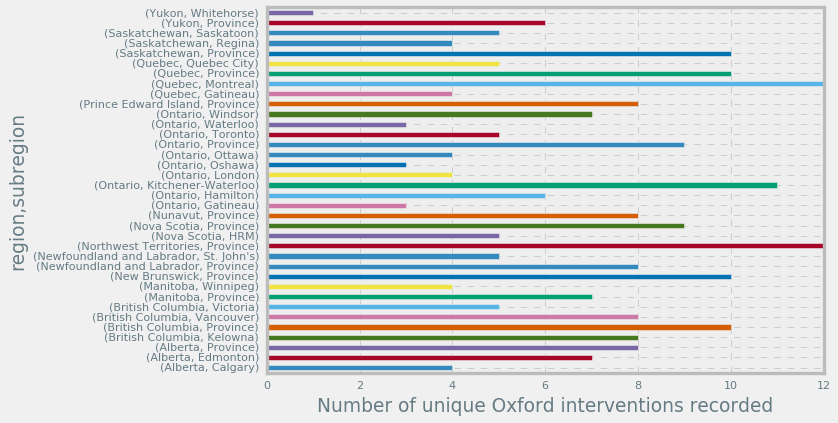

In [922]:
full_df.fillna('Province').groupby(by=['region', 'subregion'])['oxford_government_response_category'].nunique().plot.barh()
plt.xlabel('Number of unique Oxford interventions recorded')


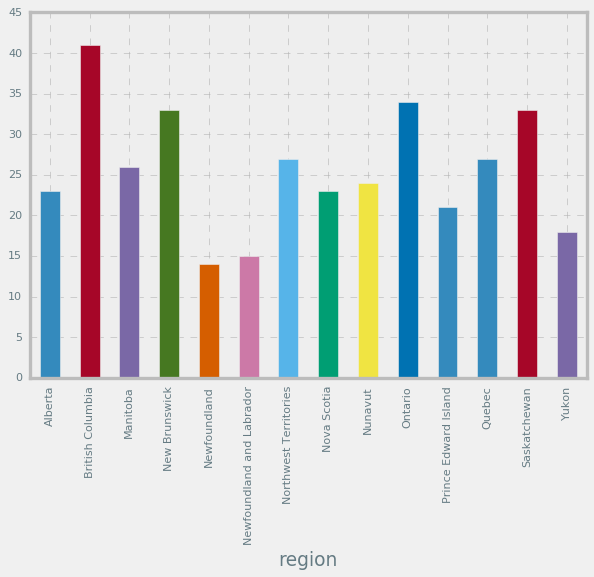

In [786]:
provinces_df.groupby(by='region')['intervention_category'].nunique().plot.bar()

Text(0.5,0,'Number of unique interventions recorded')

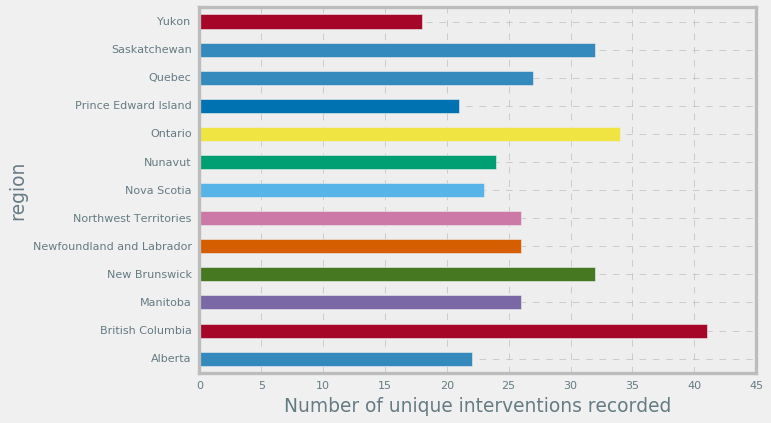

In [923]:
full_df[full_df['subregion'].isna()].groupby(by=['region'])['intervention_category'].nunique().plot.barh()
plt.xlabel('Number of unique interventions recorded')


Text(0.5,0,'Number of unique interventions recorded')

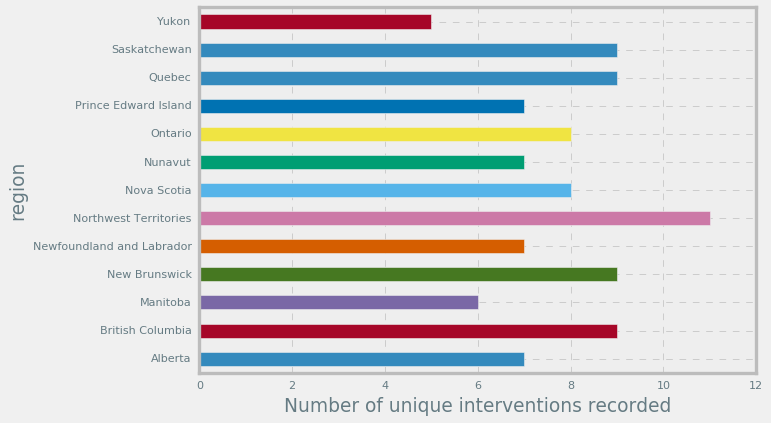

In [924]:
full_df[full_df['subregion'].isna()].groupby(by=['region'])['oxford_government_response_category'].nunique().plot.barh()
plt.xlabel('Number of unique interventions recorded')


Text(0.5,0,'Oxford Fiscal Measure (CAD) recorded')

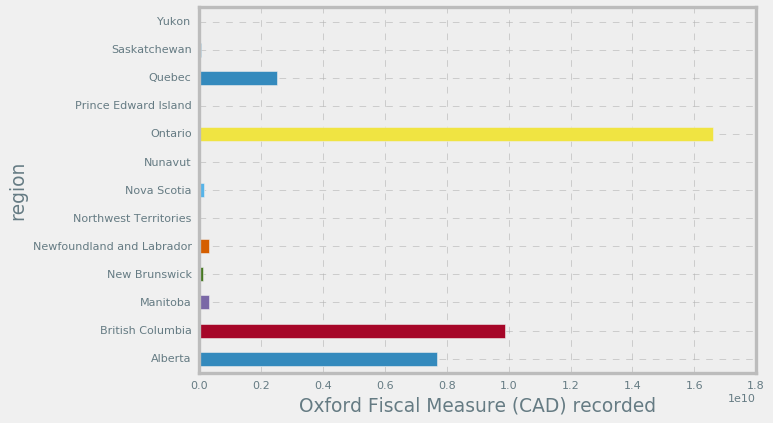

In [925]:
full_df[full_df['subregion'].isna()].groupby(by=['region'])['oxford_fiscal_measure_cad'].sum().plot.barh()
plt.xlabel('Oxford Fiscal Measure (CAD) recorded')


Text(0,0.5,'$ / person')

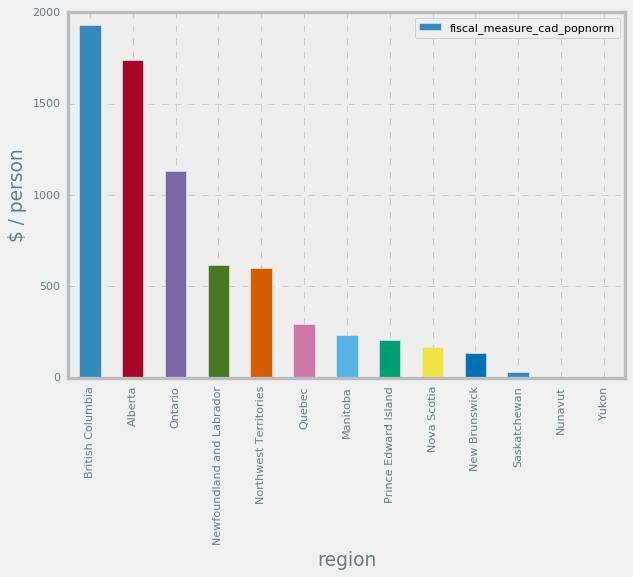

In [858]:
df = pd.DataFrame(provinces_df.groupby(by='region')['oxford_fiscal_measure_cad'].sum())
df['region'] = df.index
df = df.merge(population_df, on='region', how='left')
df['fiscal_measure_cad_popnorm'] = df['oxford_fiscal_measure_cad'] /  df['population_q1_2020']
df = df.sort_values(by='fiscal_measure_cad_popnorm', ascending=False)
df.plot.bar(x='region', y='fiscal_measure_cad_popnorm')
plt.ylabel("$ / person")

Text(0,0.5,'fiscal measures (CAD)')

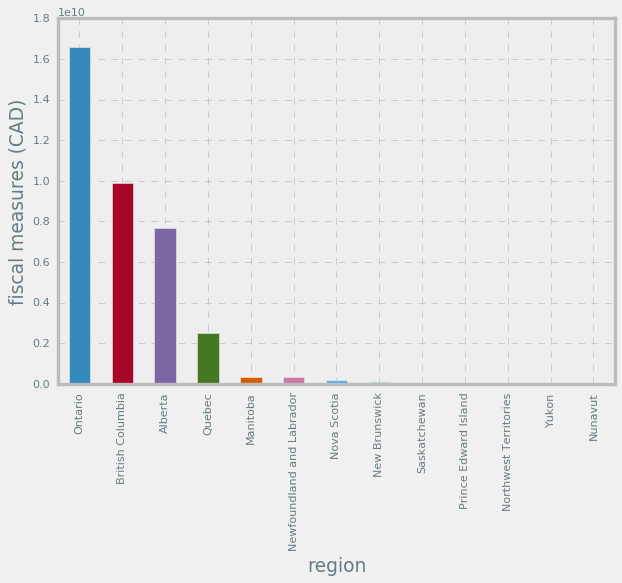

In [859]:
provinces_df.groupby(by='region')['oxford_fiscal_measure_cad'].sum().sort_values(ascending=False).plot.bar()
plt.ylabel('fiscal measures (CAD)')

## Clustering Representation

For now just showing clustering on hand-applied labels.

In [995]:
>>> from sklearn import preprocessing
df = full_df.fillna(-1)

le_re = preprocessing.LabelEncoder()
le_re.fit(df['region'].astype(str).values)
le_ic = preprocessing.LabelEncoder()
le_ic.fit(df['intervention_category'].astype(str).values)
le_ec = preprocessing.LabelEncoder()
le_ec.fit(df['enforcement_category'].astype(str).values)
le_tp = preprocessing.LabelEncoder()
le_tp.fit(df['target_population_category'].astype(str).values)

LabelEncoder()

In [996]:
y = le_ic.transform(df['intervention_category'].astype(str))
X = np.array([
    le_re.transform(df['region'].astype(str)),
    le_ec.transform(df['enforcement_category'].astype(str)),
    le_tp.transform(df['target_population_category'].astype(str)),
    df['oxford_closure_code'].astype(int),
    df['oxford_public_info_code'].astype(int),
    df['oxford_travel_code'].astype(int),
    df['oxford_geographic_target_code'].astype(int)]).T

In [997]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X, y)
X_embedded

array([[  9.330028 ,   5.475014 ],
       [  9.330028 ,   5.475014 ],
       [ -9.283811 ,  -7.7373724],
       ...,
       [-12.225715 ,  21.050224 ],
       [  4.492514 ,  15.64882  ],
       [-12.158123 ,  21.529375 ]], dtype=float32)

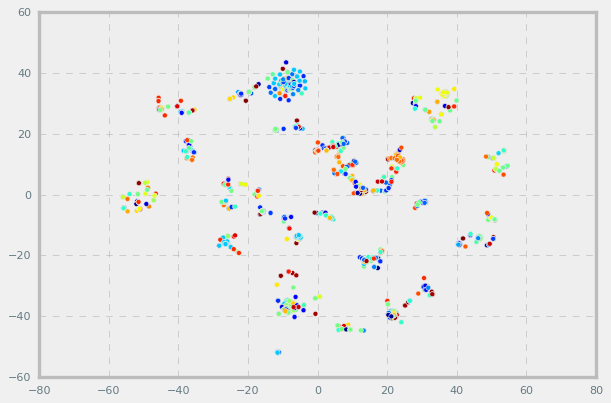

In [998]:
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y)

# LDA on Intervention Text

Topics on full text just find regions. Need to remove all location-based markers from full text.

In [760]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction import text 

We choose to leave out geography-related words by marking them as stop words. This seems to prevent the model from picking up on the strong geographical topics in our selection of data and helps it discover other useful clusters.

In [860]:
r = [x.split() for x in full_df['region'].dropna().unique().tolist()]
r = np.hstack([np.array(x) for x in r])
sr = [x.split() for x in full_df['subregion'].dropna().unique().tolist()]
sr = np.hstack([np.array(x) for x in sr])
geo_stop_words = np.append(r, sr)
geo_stop_words = [x.lower() for x in geo_stop_words]
geo_stop_words = [x.replace('(','').replace(')','') for x in geo_stop_words]
stop_words = text.ENGLISH_STOP_WORDS.union(geo_stop_words)

We automate the selection of the number of topics by calculating the perplexity score for the model and minimizing across the number of topics.

In [926]:
def topic_selection(tf, tmax, tstep, debug=False):
    topic_sizes = np.arange(1, tmax, tstep)
    topic_ll = []
    topic_perplexity = []
    models = []
    for k in topic_sizes:


        n_topics = k

        lda = LatentDirichletAllocation(n_components=n_topics, 
            max_iter=10, 
            learning_method='online',
            learning_offset=50.,
            random_state=3).fit(tf)

        # use perplexity for now.. try gensim coherence later
        # see https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/topic_coherence_model_selection.ipynb
        topic_ll.append( lda.score(tf) )
        p = lda.perplexity(tf)
        topic_perplexity.append( p )
        models.append(lda)
        
        if (debug):
            print('Topics: ', k, ' perplexity ', p)
    
    idx = np.where(topic_perplexity == np.amin(topic_perplexity))[0][0]
    selected_lda = models[idx]
    ntopics = topic_sizes[idx]
    return topic_sizes, topic_perplexity, selected_lda, ntopics

In [961]:
def show_topk_words(lda, k, tf_feature_names):
    n_top_words = k
    for topic_i, topic in enumerate(lda.components_):
        print( "Topic ", topic_i )
        print( "Words: ", [print(tf_feature_names[i]) for i in topic.argsort()[:-n_top_words - 1:-1]] )
        

### Full Source Text

Here we apply LDA to the full text of each source (except french sources)

In [869]:
len(full_df['source_url'].unique()) / full_df.shape[0]

0.5554279149913842

In [999]:
# Remove french
engl_df = full_df[full_df['region'] != 'Quebec']
full_text = engl_df['source_full_text'].drop_duplicates().astype(str)
data = full_text.values
data = [re.sub('\s+', ' ', text) for text in data] # remove new lines
data = [re.sub("\'", "", text) for text in data] # remove quotes
len(data)

915

In [820]:
n_words = 1000
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=n_words, stop_words=stop_words)
tf = tf_vectorizer.fit_transform( data )
tf_feature_names = tf_vectorizer.get_feature_names()

In [927]:
topic_sizes, topic_perplexity, lda, ntopics = topic_selection(tf, 40, 2)
print("Selected ", ntopics, " topics")

Selected  13  topics


Text(0,0.5,'perplexity')

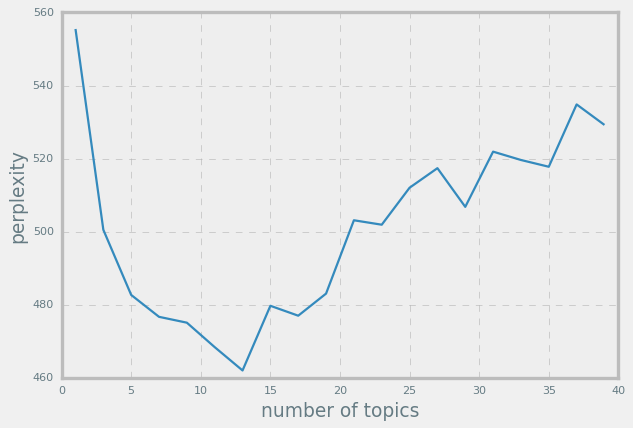

In [862]:
plt.plot(topic_sizes, topic_perplexity)
plt.xlabel('number of topics')
plt.ylabel('perplexity')

In [962]:
show_topk_words(lda, 15, tf_feature_names)

Topic  0
service
bus
customers
march
transit
halifax
games
hsr
buses
use
route
passengers
social
distancing
closed
Words:  [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
Topic  1
867
gov
pdf
nu
gn
chief
department
office
gatherings
emergency
grocery
975
stores
events
store
Words:  [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
Topic  2
order
health
public
officer
act
march
2020
section
person
police
request
measures
orders
medical
effect
Words:  [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
Topic  3
students
school
education
learning
schools
parents
year
12
communities
minister
leaders
break
institutions
march
nwt
Words:  [None, None, None, None, None, None, None, None, None, None, None, None, None, None, None]
Topic  4
com
residents
ca
twitter
facebook
instagram
media
cityofto
information
people
416
public
338
economic
health
Words:  [None, None, None, N

# LDA on Intervention Summary Text

In [591]:
full_summaries = full_df['intervention_summary'].drop_duplicates().astype(str)

In [722]:

n_words = 200

tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=n_words, stop_words='english')
tf = tf_vectorizer.fit_transform( full_summaries )
tf_feature_names = tf_vectorizer.get_feature_names()

Topics:  1
161.6655431885962
Topics:  3
158.8819707894937
Topics:  5
160.2027677133803
Topics:  7
150.99204789508047
Topics:  9
162.65943988464053
Topics:  11
160.22828200412295
Topics:  13
154.98036726891738
Topics:  15
152.8002833678197
Topics:  17
167.88116260735652
Topics:  19
164.78970754154554
Topics:  21
163.74855208606476
Topics:  23
183.4391305930914
Topics:  25
179.03508701177822
Topics:  27
174.4884012679839
Topics:  29
186.72993943882813
Topics:  31
184.26920024260096
Topics:  33
189.77777779035577
Topics:  35
202.4859365939989
Topics:  37
200.80264286558486
Topics:  39
214.22437366162393


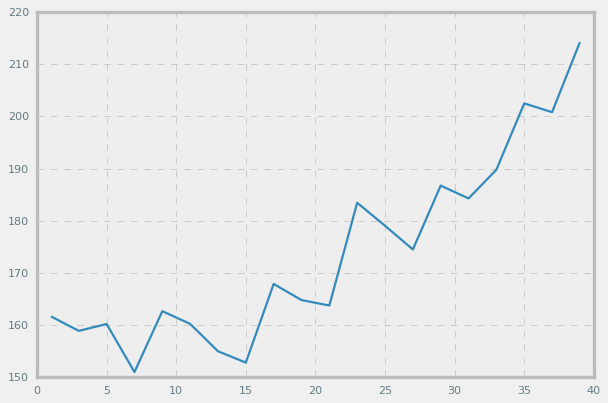

In [723]:
topic_sizes, topic_perplexity, lda, ntopics = topic_selection(tf, 40, 2)
print("Selected ", ntopics, " topics")

In [ ]:
plt.plot(topic_sizes, topic_perplexity)
plt.xlabel('number of topics')
plt.ylabel('perplexity')

In [724]:
show_topk_words(lda, 20, tf_feature_names)

Topic  0
Words:  ['covid', '19', 'health', 'home', 'centre', 'work', 'community', 'employees', 'working', 'assessment', 'patients', 'positive', 'people', 'response', 'information', 'help', 'symptoms', 'testing', 'provide', 'online']
Topic  1
Words:  ['care', 'closure', 'facilities', 'term', 'long', 'centres', 'visitors', 'screening', 'parks', 'parking', 'homes', 'municipal', 'closed', 'park', 'child', 'support', 'hospital', 'close', 'programs', 'hospitals']
Topic  2
Words:  ['emergency', 'provincial', 'people', 'social', 'service', 'distancing', 'gatherings', 'closure', 'guidance', 'state', 'public', '50', 'restaurants', 'businesses', 'measures', 'services', 'delivery', 'declared', 'bars', 'operations']
Topic  3
Words:  ['public', 'health', 'cancelled', 'services', 'contact', 'events', 'transit', 'cancellation', 'use', 'food', 'april', 'capacity', 'investment', 'day', 'stores', 'medical', 'retail', 'cleaning', 'homeless', 'funding']
Topic  4
Words:  ['self', '14', 'days', 'isolate', 't

## Retrieving relevant research related to interventions

Guiding searches related to interventions is particularly important because research comes in many forms and across many jurisdictions. We compare using the human-crafted labels as search terms with LDA-generated word clusters from selected Canadian intervention articles and examine the results by inspection to determine relevancy of the results.



In [964]:
# Making use of Covidex as demonstrated here:
# https://colab.research.google.com/drive/1mrapJp6-RIB-3u6FaJVa4WEwFdEBOcTe

!pip install pyserini==0.8.1.0
import json
import os


    100% |################################| 57.7MB 203kB/s ta 0:00:011    51% |################                | 29.6MB 10.0MB/s eta 0:00:03
    100% |################################| 1.1MB 4.8MB/s ta 0:00:011
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [965]:
!wget https://www.dropbox.com/s/d6v9fensyi7q3gb/lucene-index-covid-2020-04-03.tar.gz
!tar xvfz lucene-index-covid-2020-04-03.tar.gz

--2020-04-15 05:27:09--  https://www.dropbox.com/s/d6v9fensyi7q3gb/lucene-index-covid-2020-04-03.tar.gz
Resolving www.dropbox.com (www.dropbox.com)... 162.125.11.1, 2620:100:6050:1::a27d:b01
Connecting to www.dropbox.com (www.dropbox.com)|162.125.11.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/d6v9fensyi7q3gb/lucene-index-covid-2020-04-03.tar.gz [following]
--2020-04-15 05:27:10--  https://www.dropbox.com/s/raw/d6v9fensyi7q3gb/lucene-index-covid-2020-04-03.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc31bfe009db4c0793b021687bc5.dl.dropboxusercontent.com/cd/0/inline/A1169WWXgTnwZotSRZTqyi9jVwZ93xj6y2Y_GlP2mBBICXEbVBKWwpfi5JBS8_dcbwHTFEJ0dVM4aX070lJUk7CbUmHfxReOlNBL60otHAil7VzSxj4z7NOJ0wwhSJq4f-w/file# [following]
--2020-04-15 05:27:10--  https://uc31bfe009db4c0793b021687bc5.dl.dropboxusercontent.com/cd/0/inline/A1169WWXgTnwZotSRZTqyi9jVwZ93xj6y2Y_GlP2

In [966]:
!du -h lucene-index-covid-2020-04-03

1.5G	lucene-index-covid-2020-04-03


In [972]:
from pyserini.search import pysearch

searcher = pysearch.SimpleSearcher('lucene-index-covid-2020-04-03/')
hits = searcher.search('incubation period of COVID-19')

CalledProcessError: Command '['which', 'javac']' returned non-zero exit status 1.

In [967]:
for intervention_cat in full_df['intervention_category'].unique():
    print(intervention_cat)

Testing Definition Change
Recommended self-isolation
Public Announcement
Recreational / Entertainment Facility Closure
Public Reassurance
Travel Restriction (External)
Creation of command center
Symptom screening
School closure
Employment Protections
Public event size restriction (<=50)
Social Distancing Announcement
Declaration of emergency (or similar)
Emergency healthcare funding
Non-essential workplace closure
Emergency economic funding
Travel Restriction (Internal)
Self-monitored quarantine
First case announcement
Improve testing capacity
Public event size restriction (<=2)
Border closure
Healthcare facility restrictions
Self-Assessment Tool Released
Manufacturing repurposing
Emergency social services funding
Increased sanitation measures
Public park closure
Social Service provider restrictions
Public event/ meeting cancellation or postponement
Public park restrictions
nan
General case announcement
First multiple case announcement
Restaurant visiting restrictions
Tourism site rest

In [ ]:
from pyserini.search import pysearch